In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [4]:
epsilon = math.ulp(1.0)
def softmax(x):
    return np.nan_to_num((np.exp(x)+epsilon))/np.nan_to_num((sum(np.exp(x))+epsilon))

def interleave2d(a, b):
    """Interleave between columns of two arrays"""
    c = np.empty((len(a), a.shape[1] * 2), dtype=a.dtype)
    c[:, 0::2] = a
    c[:, 1::2] = b
    return c

def class_sample(class_vectors, D, class_ID, eps=float(0.1)):
    numer = class_vectors[:,class_ID] + eps*np.random.normal(loc=0.0, scale=1/D, size=D)
    denom = np.sqrt(1+(eps**2))
    return numer / denom

def generate_token_sequence(class_vectors, class_labels, length=20, mask=True):
    classes_for_sequence = np.random.randint(1,high=K, size= int(length/2)-1 )
    classes_in_sequence_order = np.append(classes_for_sequence, np.random.choice(classes_for_sequence))

    classes_token_sequence = np.zeros((int(length/2),D))
    labels_token_sequence = np.zeros((int(length/2),D))
    for i in range(int(length/2)):
        classes_token_sequence[i,:] = class_sample(class_vectors, D, classes_in_sequence_order[i])
    for i in range(int(length/2)):
        labels_token_sequence[i,:] = class_labels[:,classes_in_sequence_order[i]]
        
    token_sequence = interleave2d(classes_token_sequence.T,labels_token_sequence.T)
    if mask:
        token_sequence[:,-1] = 0

    return token_sequence, np.repeat(classes_in_sequence_order,2)

In [5]:
D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 2

class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

values = np.copy(token_sequence)
queries = np.zeros((D,sequence_length))
keys = np.zeros((D,sequence_length))

for token in range(sequence_length):
    if token==0:
        queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
    elif token==(sequence_length-1):
        queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
    else:
        queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        
next_token_attn = np.zeros((sequence_length))
for i in range(0,sequence_length):
    prod = np.dot(keys[:,i],queries[:,-1])
    next_token_attn[i] = prod
    
out = values[:,np.argmax(next_token_attn)]

np.all(out == class_labels[:,classes_sequence[-1]])

True

In [11]:
trials = 1_000
correct_trials = 0

D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 2

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 1000


In [13]:
D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 2

trial = 1
class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

values = np.copy(token_sequence)
queries = np.zeros((D,sequence_length))
keys = np.zeros((D,sequence_length))

for token in range(sequence_length):
    if token==(sequence_length-1):
        queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
    else:
        queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

next_token_attn = np.zeros((sequence_length))
for i in range(0,sequence_length):
    prod = np.dot(keys[:,i],queries[:,-1])
    next_token_attn[i] = prod

out = values[:,np.argmax(next_token_attn)]

if np.all(out == class_labels[:,classes_sequence[-1]]):
    print("Correct trial")
else:
    print("Incorrect trial")

Correct trial


In [256]:
trials = 1_000

D = 100 # number of non-positional dimensions
K = 50 # number of classes
sequence_length = 20
amp = 1

correct_trials_counts = []

for amp in np.linspace(0,2,num=100):
    correct_trials = 0
    for trial in range(trials):
        class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
        class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

        token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

        values = np.copy(token_sequence)
        queries = np.zeros((D,sequence_length))
        keys = np.zeros((D,sequence_length))

        for token in range(sequence_length):
            if token==0:
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            elif token==(sequence_length-1):
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
            else:
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

        next_token_attn = np.zeros((sequence_length))
        for i in range(0,sequence_length):
            prod = np.dot(keys[:,i],queries[:,-1])
            next_token_attn[i] = prod

        out = values[:,np.argmax(next_token_attn)]

        if np.all(out == class_labels[:,classes_sequence[-1]]):
            correct_trials += 1
    correct_trials_counts.append(correct_trials)

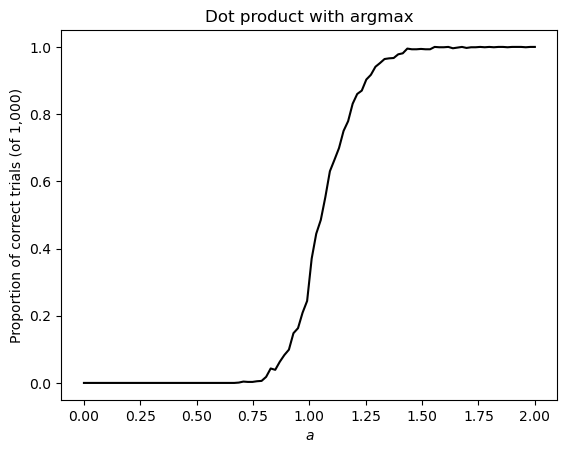

In [265]:
plt.plot(np.linspace(0,2,num=100), [x/1000 for x in correct_trials_counts], color='black')
plt.title("Dot product with argmax")
plt.ylabel("Proportion of correct trials (of 1,000)")
plt.xlabel("$a$")
plt.show()

In [285]:
trials = 1_000

D = 100 # number of non-positional dimensions
K = 50 # number of classes
sequence_length = 20
amp = 1

correct_trials_counts = []

for amp in np.linspace(0,2,num=100):
    correct_trials = 0
    for trial in range(trials):
        class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
        class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

        token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

        values = np.copy(token_sequence)
        queries = np.zeros((D,sequence_length))
        keys = np.zeros((D,sequence_length))

        for token in range(sequence_length):
            if token==0:
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            elif token==(sequence_length-1):
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
            else:
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

        next_token_attn = np.zeros((sequence_length))
        for i in range(0,sequence_length):
            prod = np.corrcoef(keys[:,i],queries[:,-1])[0,1]
            next_token_attn[i] = prod

        out = values[:,np.argmax(next_token_attn)]

        if np.all(out == class_labels[:,classes_sequence[-1]]):
            correct_trials += 1
    correct_trials_counts.append(correct_trials)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


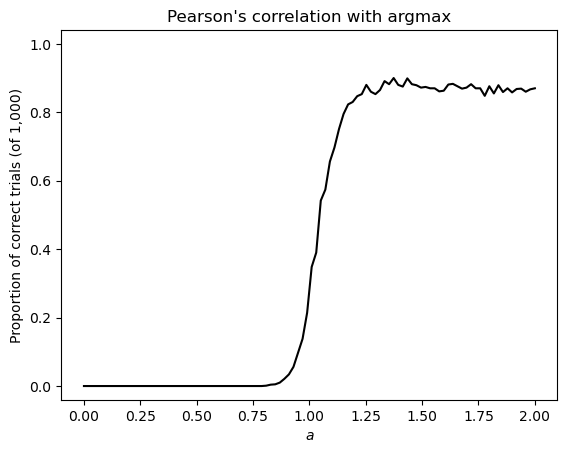

In [291]:
plt.plot(np.linspace(0,2,num=100), [x/1000 for x in correct_trials_counts], color='black')
plt.title("Pearson's correlation with argmax")
plt.ylim(-0.04,1.04)
plt.ylabel("Proportion of correct trials (of 1,000)")
plt.xlabel("$a$")
plt.show()

In [292]:
trials = 1_000

D = 100 # number of non-positional dimensions
K = 50 # number of classes
sequence_length = 20
amp = 2

correct_trials_counts = []

for sequence_length in [10,20,40,100,500,1000]:
    correct_trials = 0
    for trial in range(trials):
        class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
        class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

        token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

        values = np.copy(token_sequence)
        queries = np.zeros((D,sequence_length))
        keys = np.zeros((D,sequence_length))

        for token in range(sequence_length):
            if token==0:
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            elif token==(sequence_length-1):
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
            else:
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

        next_token_attn = np.zeros((sequence_length))
        for i in range(0,sequence_length):
            prod = np.dot(keys[:,i],queries[:,-1])
            next_token_attn[i] = prod

        out = values[:,np.argmax(next_token_attn)]

        if np.all(out == class_labels[:,classes_sequence[-1]]):
            correct_trials += 1
    correct_trials_counts.append(correct_trials)

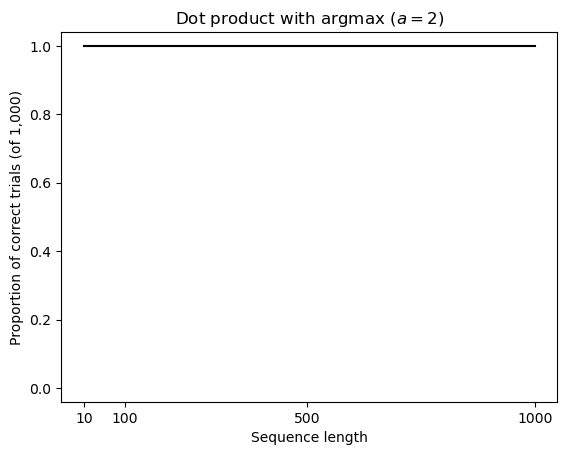

In [298]:
plt.plot([10,20,40,100,500,1000], [x/1000 for x in correct_trials_counts], color='black')
plt.title("Dot product with argmax ($a=2$)")
plt.ylim(-0.04,1.04)
plt.xticks([10,100,500,1000])
plt.ylabel("Proportion of correct trials (of 1,000)")
plt.xlabel("Sequence length")
plt.show()

In [299]:
trials = 1_000

D = 100 # number of non-positional dimensions
K = 50 # number of classes
sequence_length = 20
amp = 2

correct_trials_counts = []

for D in [10,20,40,100,500,1000]:
    correct_trials = 0
    for trial in range(trials):
        class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
        class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

        token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

        values = np.copy(token_sequence)
        queries = np.zeros((D,sequence_length))
        keys = np.zeros((D,sequence_length))

        for token in range(sequence_length):
            if token==0:
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            elif token==(sequence_length-1):
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
            else:
                queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
                keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

        next_token_attn = np.zeros((sequence_length))
        for i in range(0,sequence_length):
            prod = np.dot(keys[:,i],queries[:,-1])
            next_token_attn[i] = prod

        out = values[:,np.argmax(next_token_attn)]

        if np.all(out == class_labels[:,classes_sequence[-1]]):
            correct_trials += 1
    correct_trials_counts.append(correct_trials)

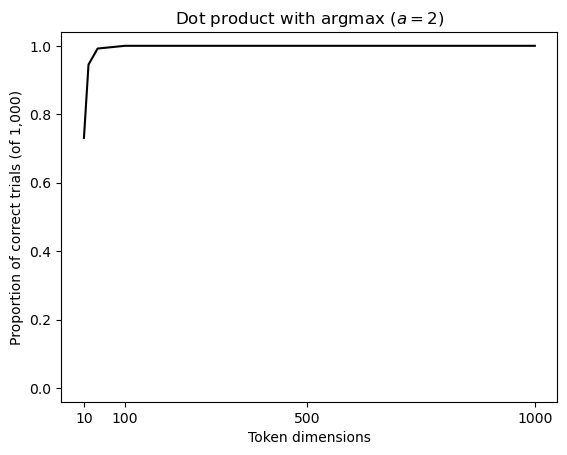

In [300]:
plt.plot([10,20,40,100,500,1000], [x/1000 for x in correct_trials_counts], color='black')
plt.title("Dot product with argmax ($a=2$)")
plt.ylim(-0.04,1.04)
plt.xticks([10,100,500,1000])
plt.ylabel("Proportion of correct trials (of 1,000)")
plt.xlabel("Token dimensions")
plt.show()

In [126]:
trials = 1_000
correct_trials = 0

D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 1

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 325


In [127]:
trials = 1_000
correct_trials = 0

D = 1000 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 1

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 315


In [128]:
trials = 1_000
correct_trials = 0

D = 1000 # number of non-positional dimensions
K = 512*2 # number of classes
sequence_length = 20
amp = 1

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 321


In [129]:
trials = 1_000
correct_trials = 0

D = 100 # number of non-positional dimensions
K = 512*2 # number of classes
sequence_length = 20
amp = 1

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 342


In [130]:
trials = 1_000
correct_trials = 0

D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 100
amp = 1

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 315


In [131]:
trials = 1_000
correct_trials = 0

D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 1.5

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 994


In [132]:
trials = 1_000
correct_trials = 0

D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 1.25

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 907


In [133]:
trials = 1_000
correct_trials = 0

D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 1.75

for trial in range(trials):
    class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
    class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

    token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

    values = np.copy(token_sequence)
    queries = np.zeros((D,sequence_length))
    keys = np.zeros((D,sequence_length))

    for token in range(sequence_length):
        if token==0:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        elif token==(sequence_length-1):
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
        else:
            queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
            keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

    next_token_attn = np.zeros((sequence_length))
    for i in range(0,sequence_length):
        prod = np.dot(keys[:,i],queries[:,-1])
        next_token_attn[i] = prod

    out = values[:,np.argmax(next_token_attn)]

    if np.all(out == class_labels[:,classes_sequence[-1]]):
        correct_trials += 1
        
print("Number of correct trials:", correct_trials)

Number of correct trials: 1000


In [232]:
D = 100 # number of non-positional dimensions
K = 512 # number of classes
sequence_length = 20
amp = 2

class_vectors = np.random.normal(size=(D,K))/np.sqrt(D)
class_labels = np.random.normal(size=(D,K))/np.sqrt(D)

token_sequence, classes_sequence = generate_token_sequence(class_vectors, class_labels, sequence_length)

values = np.copy(token_sequence)
queries = np.zeros((D,sequence_length))
keys = np.zeros((D,sequence_length))

for token in range(sequence_length):
    if token==0:
        queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
    elif token==(sequence_length-1):
        queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        keys[:,token] = np.random.normal(size=D)/np.sqrt(D)
    else:
        queries[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)
        keys[:,token] = (token_sequence[:,token-1]*amp + token_sequence[:,token])/(amp+1)

next_token_attn = np.zeros((sequence_length))
for i in range(0,sequence_length):
    prod = np.dot(keys[:,i],queries[:,-1])
    next_token_attn[i] = prod

out = values[:,np.argmax(next_token_attn)]

if np.all(out == class_labels[:,classes_sequence[-1]]):
    print("Correct trial")
else:
    print("Incorrect trial")

Correct trial


In [233]:
attn_mat_dotprod = np.zeros((sequence_length,sequence_length))
attn_mat_ED = np.zeros((sequence_length,sequence_length))
attn_mat_MD = np.zeros((sequence_length,sequence_length))
attn_mat_corr = np.zeros((sequence_length,sequence_length))

for i in range(0,sequence_length):
    for j in range(0,sequence_length):
        if i>j:
            attn_mat_dotprod[i,j] = np.dot(keys[:,i],queries[:,j])
            attn_mat_ED[i,j] = distance.euclidean(keys[:,i],queries[:,j])
            attn_mat_MD[i,j] = distance.cityblock(keys[:,i],queries[:,j])
            attn_mat_corr[i,j] = np.corrcoef(keys[:,i],queries[:,j])[0,1]
            
attn_mat_dotprod_softmax = np.copy(attn_mat_dotprod)
for i in range(0,sequence_length):
    attn_mat_dotprod_softmax[i,:] = softmax(attn_mat_dotprod_softmax[i,:])
attn_mat_dotprod_argmax = np.copy(attn_mat_dotprod)
for i in range(0,sequence_length):
    attn_mat_dotprod_argmax[i,:] = np.eye(sequence_length)[np.argmax(attn_mat_dotprod_argmax[i,:])]
    
attn_mat_ED_softmax = np.copy(attn_mat_ED)
for i in range(0,sequence_length):
    attn_mat_ED_softmax[i,:] = softmax(attn_mat_ED_softmax[i,:])
attn_mat_ED_argmax = np.copy(attn_mat_ED)
for i in range(0,sequence_length):
    attn_mat_ED_argmax[i,:] = np.eye(sequence_length)[np.argmax(attn_mat_ED_argmax[i,:])]

attn_mat_MD_softmax = np.copy(attn_mat_MD)
for i in range(0,sequence_length):
    attn_mat_MD_softmax[i,:] = softmax(attn_mat_MD_softmax[i,:])
attn_mat_MD_argmax = np.copy(attn_mat_MD)
for i in range(0,sequence_length):
    attn_mat_MD_argmax[i,:] = np.eye(sequence_length)[np.argmax(attn_mat_MD_argmax[i,:])]

attn_mat_corr_softmax = np.copy(attn_mat_corr)
for i in range(0,sequence_length):
    attn_mat_corr_softmax[i,:] = softmax(attn_mat_corr_softmax[i,:])
attn_mat_corr_argmax = np.copy(attn_mat_corr)
for i in range(0,sequence_length):
    attn_mat_corr_argmax[i,:] = np.eye(sequence_length)[np.argmax(attn_mat_corr_argmax[i,:])]

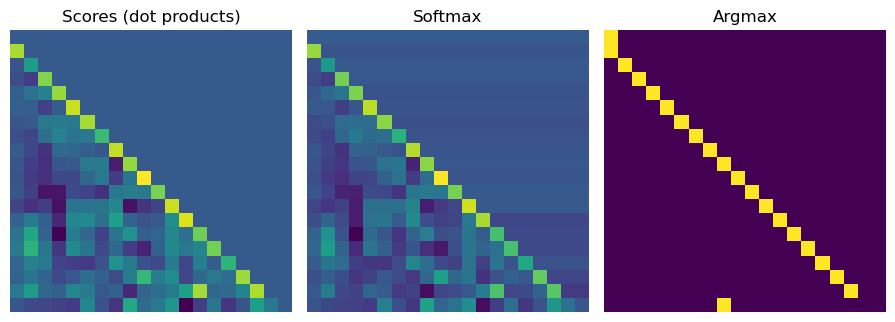

In [234]:
plt.figure(figsize=(5*3,5))

plt.subplot(1,N,1)
plt.imshow(attn_mat_dotprod)
plt.axis("off")
plt.title("Scores (dot products)")

plt.subplot(1,N,2)
plt.imshow(attn_mat_dotprod_softmax)
plt.axis("off")
plt.title("Softmax")

plt.subplot(1,N,3)
plt.imshow(attn_mat_dotprod_argmax)
plt.axis("off")
plt.title("Argmax")

plt.tight_layout()
plt.show()

<Figure size 500x1500 with 0 Axes>

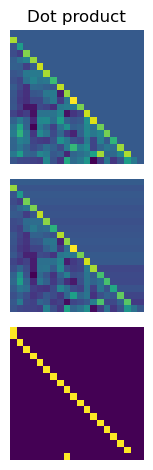

In [283]:
plt.figure(figsize=(5,5*3))
fig, axs = plt.subplots(3, 1)

#plt.subplot(1,1)
axs[0].imshow(attn_mat_dotprod)
axs[0].axis("off")
axs[0].set_title("Dot product")

#plt.subplot(2)
axs[1].imshow(attn_mat_dotprod_softmax)
axs[1].axis("off")
#axs[1].set_title("Softmax")

#plt.subplot(3)
axs[2].imshow(attn_mat_dotprod_argmax)
axs[2].axis("off")
#axs[2].set_title("Argmax")

plt.tight_layout()
plt.show()

<Figure size 500x1500 with 0 Axes>

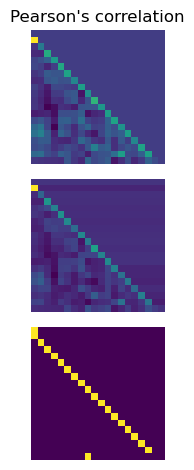

In [284]:
plt.figure(figsize=(5,5*3))
fig, axs = plt.subplots(3, 1)

#plt.subplot(1,1)
axs[0].imshow(attn_mat_corr)
axs[0].axis("off")
axs[0].set_title("Pearson's correlation")

#plt.subplot(2)
axs[1].imshow(attn_mat_corr_softmax)
axs[1].axis("off")
#axs[1].set_title("Softmax")

#plt.subplot(3)
axs[2].imshow(attn_mat_corr_argmax)
axs[2].axis("off")
#axs[2].set_title("Argmax")

plt.tight_layout()
plt.show()

<Figure size 500x1500 with 0 Axes>

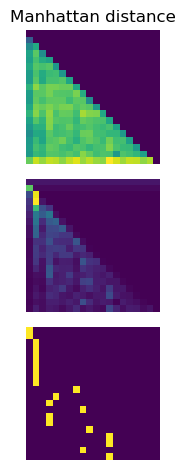

In [281]:
plt.figure(figsize=(5,5*3))
fig, axs = plt.subplots(3, 1)

#plt.subplot(1,1)
axs[0].imshow(attn_mat_MD)
axs[0].axis("off")
axs[0].set_title("Manhattan distance")

#plt.subplot(2)
axs[1].imshow(attn_mat_MD_softmax)
axs[1].axis("off")
#axs[1].set_title("Softmax")

#plt.subplot(3)
axs[2].imshow(attn_mat_MD_argmax)
axs[2].axis("off")
#axs[2].set_title("Argmax")

plt.tight_layout()
plt.show()

<Figure size 500x1500 with 0 Axes>

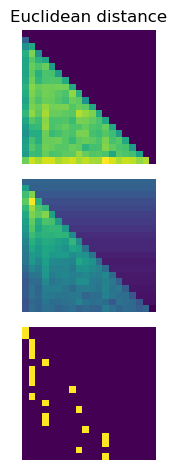

In [280]:
plt.figure(figsize=(5,5*3))
fig, axs = plt.subplots(3, 1)

#plt.subplot(1,1)
axs[0].imshow(attn_mat_ED)
axs[0].axis("off")
axs[0].set_title("Euclidean distance")

#plt.subplot(2)
axs[1].imshow(attn_mat_ED_softmax)
axs[1].axis("off")
#axs[1].set_title("Softmax")

#plt.subplot(3)
axs[2].imshow(attn_mat_ED_argmax)
axs[2].axis("off")
#axs[2].set_title("Argmax")

plt.tight_layout()
plt.show()

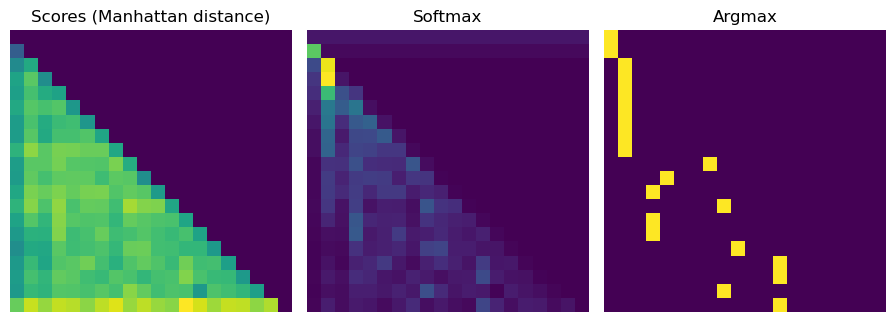

In [236]:
plt.figure(figsize=(5*3,5))

plt.subplot(1,N,1)
plt.imshow(attn_mat_MD)
plt.axis("off")
plt.title("Scores (Manhattan distance)")

plt.subplot(1,N,2)
plt.imshow(attn_mat_MD_softmax)
plt.axis("off")
plt.title("Softmax")

plt.subplot(1,N,3)
plt.imshow(attn_mat_MD_argmax)
plt.axis("off")
plt.title("Argmax")

plt.tight_layout()
plt.show()

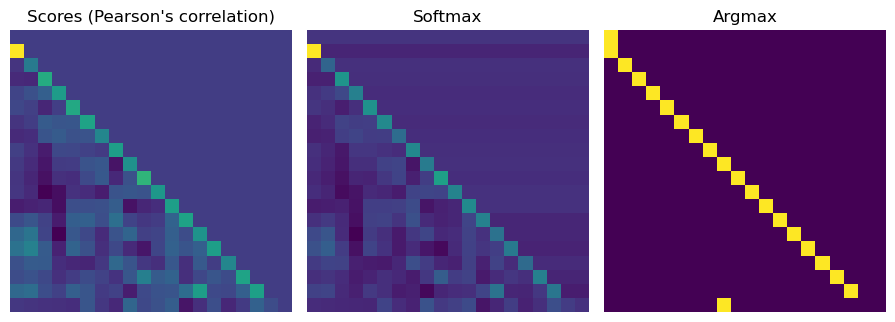

In [237]:
plt.figure(figsize=(5*3,5))

plt.subplot(1,N,1)
plt.imshow(attn_mat_corr)
plt.axis("off")
plt.title("Scores (Pearson's correlation)")

plt.subplot(1,N,2)
plt.imshow(attn_mat_corr_softmax)
plt.axis("off")
plt.title("Softmax")

plt.subplot(1,N,3)
plt.imshow(attn_mat_corr_argmax)
plt.axis("off")
plt.title("Argmax")

plt.tight_layout()
plt.show()